In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from river import stream
from river import preprocessing, linear_model, optim

In [2]:
from sklearn.datasets import fetch_california_housing
df_X, df_y  = fetch_california_housing(return_X_y=True, as_frame=True)


In [3]:
###### One
xtrain, xtest, ytrain, ytest = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
stdScaler = preprocessing.StandardScaler()

model = linear_model.LinearRegression(
                 optimizer=optim.RMSProp())

dataset = stream.iter_pandas(xtrain, ytrain)

for x, yi in dataset:
    stdScaler.learn_one(x)
    x = stdScaler.transform_one(x)
    model.learn_one(x, yi)

ypred_one = []
dataset = stream.iter_pandas(xtest, ytest)

for x, yi in dataset:
    x = stdScaler.transform_one(x)
    ypred_one.append(model.predict_one(x))




In [4]:
##### Many

xtrain, xtest, ytrain, ytest = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

stdScaler_many = preprocessing.StandardScaler()

model_many = linear_model.LinearRegression(
                 optimizer=optim.RMSProp())

dataset = stream.iter_pandas(xtrain, ytrain)

x = xtrain
yi = ytrain

stdScaler_many.learn_many(x)
x = stdScaler_many.transform_many(x)
model_many.learn_many(x, yi)

ypred_many = []
dataset = stream.iter_pandas(xtest, ytest)

x = xtest
x = stdScaler_many.transform_many(x)
ypred_many = model_many.predict_many(x)


In [5]:
mse = mean_squared_error(ytest, ypred_one)
print("MSE_one: ", mse)
print("RMSE_one: ", mse*(1/2.0))



mse = mean_squared_error(ytest, ypred_many)
print("MSE_many: ", mse)
print("RMSE_many: ", mse*(1/2.0))



MSE_one:  1.4111238139058762
RMSE_one:  0.7055619069529381
MSE_many:  5.005923888911133
RMSE_many:  2.5029619444555666


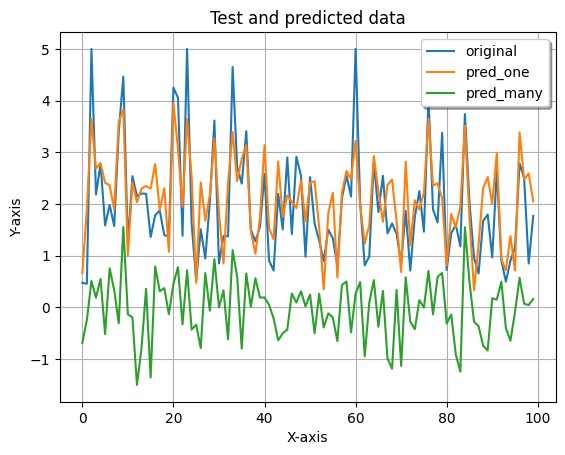

In [6]:
x_ax = range(len(ytest))
plt.plot(x_ax[0:100], ytest[0:100], label="original")
plt.plot(x_ax[0:100], ypred_one[0:100], label="pred_one")
plt.plot(x_ax[0:100], ypred_many[0:100], label="pred_many")
plt.title("Test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()